In [1]:
from google.colab import drive
drive.mount('/content/drive')
SEED = 42

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#### MAIN

In [0]:
testname = 'test1'

In [0]:
os.chdir('/content/')


In [129]:
_process_data()

CODE VERSION :  try 7 - delete and merge variables


STEP1: processing data ...

Loading data ...

Grouping activity data ...

 + making day variables for train activity

 + making day variables for test activity
activity id unique and shape :
40000 (40000, 20)
20000 (20000, 20)

Grouping payment data ...
payment id unique and shape :
23726 (23726, 3)
9454 (9454, 3)

Grouping combat data ...
combat id unique and shape :
40000 (40000, 21)
20000 (20000, 21)

Grouping pledge data ...
pledge id unique and shape :
33854 (33854, 15)
16306 (16306, 15)

Grouping trade data ...
trade id unique and shape :
60645 (60645, 16) 72300 (72300, 16)
36511 (36511, 16) 40659 (40659, 16)

Merging all data ...

merge id unique and shape :
40000 (40000, 59)
20000 (20000, 57)
test and train merge data are saved on drive/My Drive/bigcontest2019/scripts/model/metrics/nes_inference//merge/


In [37]:
train_df = _prepare_data()
train_df.head()


Preparing train data ...
train x shape:  (40000, 59)


,acc_id,survival_time,amount_spent,char_id,server,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,exp_recovery,private_shop,game_money_change,game_money_change_minus,enchant_count,login_day_max,logout_day,level,pledge_cnt,liege,pledge_id,pledge_combat_cnt,combat_play_time,non_combat_play_time,trade_day_x,trade_time_x,trade_server_x,item_amount_x,item_price_x,trade_shop_x,personal_shop_x,accessory_x,adena_x,armor_x,enchant_scroll_x,etc_x,spell_x,weapon_x,source,trade_day_y,trade_time_y,trade_server_y,item_amount_y,item_price_y,trade_shop_y,personal_shop_y,accessory_y,adena_y,armor_y,enchant_scroll_y,etc_y,spell_y,weapon_y,target,attack,cnt,pledge_ratio,day_spent
0,27835,0,0.002559,3,1,12.769067,0.130705,0.000000,0.022557,1,0.245883,0.000000,0.000000,0.081176,-0.069907,0.0,18,1,17,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.566536
1,12351,0,0.120154,8,5,37.118665,0.533964,0.039494,0.016483,7,0.983534,0.000000,0.000000,2.054225,-0.462524,0.0,28,0,17,7.124451,7.0,5.0,31.072651,104.079168,0.170040,3.0,4.0,1.0,5.393214e+00,0.000000,5.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,11.0,19.0,1.0,1.294376,1.164605,6.0,14.0,1.0,2.0,1.0,1.0,14.0,0.0,1.0,20.0,-1.427041,132.819061,0.348089,14.785724
2,125437,0,0.182593,3,1,13.483810,0.176769,0.015612,0.134217,7,12.048290,0.000000,0.000000,2.835206,-2.896324,0.0,26,1,17,2.631554,0.0,1.0,7.503624,76.618756,0.000000,10.0,18.0,1.0,2.908740e+00,0.000000,18.0,0.0,0.0,11.0,3.0,0.0,4.0,0.0,0.0,18.0,13.0,44.0,1.0,4.240387,2.444191,19.0,25.0,0.0,8.0,19.0,11.0,5.0,0.0,1.0,44.0,12.879537,104.147177,0.589153,16.338225
3,104483,0,0.016241,2,1,48.688721,0.243562,0.001155,0.006941,2,1.475301,31.897467,0.114224,0.798236,-0.710697,0.0,26,1,17,0.000000,0.0,3.0,0.305973,37.404274,0.000000,1.0,1.0,1.0,2.396984e-08,2.380465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,20.0,1.0,0.431465,0.198727,2.0,18.0,0.0,2.0,0.0,10.0,8.0,0.0,0.0,20.0,-11.779069,39.469954,0.101551,10.043731
4,4704,0,0.226396,6,5,17.134915,0.433204,0.546727,0.227314,15,0.737650,0.000000,0.000000,0.197963,-0.256239,0.0,28,0,16,1.026948,43.0,4.0,0.806822,60.580907,0.003475,3.0,6.0,1.0,5.153530e-02,0.000000,8.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,1.0,8.0,12.0,38.0,1.0,1.023133,5.527727,9.0,30.0,0.0,4.0,9.0,5.0,20.0,0.0,1.0,39.0,-11.976827,105.254987,0.398003,39.330026


In [17]:
_build_model()



STEP2: building model ...


In [155]:
train_st(train_df, xgb_params, 10, 42)

Index(['logout_day', 'trade_day_y', 'combat_play_time', 'attack', 'day_spent',
       'rich_monster', 'non_combat_play_time', 'npc_kill', 'target',
       'exp_recovery', 'trade_server_y', 'party_exp', 'adena_y',
       'trade_time_x', 'trade_server_x', 'trade_shop_x', 'level',
       'trade_day_x', 'item_amount_y', 'enchant_count', 'char_id', 'server',
       'item_amount_x', 'liege', 'private_shop', 'solo_exp', 'item_price_y',
       'quest_exp', 'trade_time_y', 'death', 'enchant_scroll_x', 'accessory_x',
       'item_price_x', 'armor_x', 'enchant_scroll_y', 'weapon_y', 'weapon_x',
       'cnt', 'adena_x', 'personal_shop_y', 'game_money_change_minus', 'etc_x',
       'game_money_change', 'source', 'spell_x', 'personal_shop_x', 'etc_y',
       'pledge_combat_cnt', 'trade_shop_y', 'spell_y', 'pledge_ratio',
       'armor_y', 'accessory_y', 'pledge_id', 'pledge_cnt', 'login_day_max'],
      dtype='object')
[0]	train-mae:0.496557	valid-mae:0.496485
Multiple eval metrics have been passed:

In [151]:
train_as(train_df, xgb_params, 10, 42)

[0]	train-mae:0.459785	valid-mae:0.4619
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
Stopping. Best iteration:
[755]	train-mae:0.104047	valid-mae:0.134154

[0]	train-mae:0.462721	valid-mae:0.450125
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
Stopping. Best iteration:
[743]	train-mae:0.107423	valid-mae:0.125079

[0]	train-mae:0.460288	valid-mae:0.459806
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
Stopping. Best iteration:
[752]	train-mae:0.107045	valid-mae:0.131694

[0]	train-mae:0.457298	valid-mae:0.471816
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
Stopping. Best iteration:
[813]	train-mae:0.0

In [0]:
## main
def main():
    _process_data()
    train_df, train_as, train_st = _prepare_data()
#     _load_merge_data()
    _build_model()
    _train_predict_amount()
    _train_predict_survival()
    _generate_submission()
    

if __name__ == "__main__":
    
    testname = 'test1'
    print(('*'* 50) +'\ntry model to test1 data\n' + ('*'*50))
    main()
    print('\n\n\nThe end.\n\n\n')
    
#     testname = 'test2'
#     print(('*'* 50) +'\ntry model to test2 data\n' + ('*'*50))
#     main()
#     print('\n\n\nThe end.\n\n\n')

#### try 7 - delete and merge variables 
(2019-08-30 09:43:50 PM	6772.33	2496.24	9268.57)

In [0]:

# -*- coding: utf-8 -*-


from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from collections import defaultdict
import xgboost as xgb
from datetime import datetime
import gc
import os
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

from tqdm import tqdm

# model
import lightgbm as lgb
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


## STEP0: do setting
class Settings(Enum):
    global train_path
    global test_path
    global submission_path
    global testname
    global codeversion
    
    codeversion = 'try 7 - delete and merge variables'
    
    path            = 'drive/My Drive/bigcontest2019/'
    train_path      = path + 'data/train/'
    test_path       = path + 'data/test/'
    submission_path = path + 'scripts/model/metrics/nes_inference/'
        
    def __str__(self):
        return self.value
        
    
## STEP1: process data    
def fill_NA(df):
    print('\nFilling NA ...')
    
    na_ratio = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
    print('NA ratio: ')
    print(na_ratio) 
    
    for feature in df:
        if df[feature].dtype == 'object':
            df[feature] = df[feature].fillna("None")
        else:
            df[feature] = df[feature].fillna(0)
    
def encode_features(df):
    print('\nEncoding features ...')
    
    for feature in df:
        if df[feature].dtype == 'object':
            print('Encoding ', feature)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[feature].values))
            df[feature] = lbl.transform(list(df[feature].values))
    
# def display_feature_target(df, feature):
#     fig, ax = plt.subplots()
#     ax.scatter(x = df[feature], y = df['logerror'])
#     plt.ylabel('logerror', fontsize=13)
#     plt.xlabel(feature, fontsize=13)
#     plt.show()
    
def _process_data():
    
    print('CODE VERSION : ', codeversion)
    print('\n\nSTEP1: processing data ...')
    
    global train_merge
    global test_merge

        
    # load data
    print('\nLoading data ...')
    
    train_label = pd.read_csv(train_path + 'train_label.csv')
    train_activity = pd.read_csv(train_path + 'train_activity.csv')
    train_combat = pd.read_csv(train_path + 'train_combat.csv')
    train_payment = pd.read_csv(train_path + 'train_payment.csv')
    train_pledge = pd.read_csv(train_path + 'train_pledge.csv')
    train_trade = pd.read_csv(train_path + 'train_trade.csv')

    test_activity = pd.read_csv(test_path + testname + '_activity.csv')
    test_combat = pd.read_csv(test_path + testname + '_combat.csv')
    test_payment = pd.read_csv(test_path + testname + '_payment.csv')
    test_pledge = pd.read_csv(test_path + testname + '_pledge.csv')
    test_trade = pd.read_csv(test_path  + testname + '_trade.csv')

    
    
    print('\nGrouping activity data ...')

    train_activity['game_money_change_minus'] = train_activity['game_money_change'] #game_money_change를 마이너스끼리, 플러스끼리 분리
    train_activity['game_money_change_minus'] = [0 if i > 0 else i for i in train_activity['game_money_change_minus']]
    train_activity['game_money_change'] = [0 if i < 0 else i for i in train_activity['game_money_change']]

    test_activity['game_money_change_minus'] = test_activity['game_money_change']
    test_activity['game_money_change_minus'] = [0 if i > 0 else i for i in test_activity['game_money_change_minus']]
    test_activity['game_money_change'] = [0 if i < 0 else i for i in test_activity['game_money_change']]

    activity_agg = {
        'day':'nunique', 'char_id':'nunique','server':'nunique', 'playtime':'sum', 'npc_kill':'sum', 
        'solo_exp':'sum','party_exp':'sum','quest_exp':'sum','rich_monster':'sum', 
        'death':'sum', 'revive':'sum','exp_recovery':'sum','fishing':'sum','private_shop':'sum',
        'game_money_change':'sum', 'game_money_change_minus':'sum','enchant_count':'sum'}
    
    train_activity_merge = train_activity.groupby('acc_id', as_index = False).agg(activity_agg).reset_index(drop=True)
    test_activity_merge = test_activity.groupby('acc_id', as_index = False).agg(activity_agg).reset_index(drop=True)
    
    acc_id_list = train_activity['acc_id'].unique().tolist()
    login_day_max = []
    logout_day = []
    
    print('\n + making day variables for train activity')

    for i in acc_id_list :
        dayunique = train_activity[train_activity['acc_id'] == i]['day'].unique().tolist() # i아이디의 접속일 list화
        in_list = [0] * 28
        in_value = 0
        daylogin = 1

        out_list = [0] * 28
        out_value = 0
        day_logout = 0

        # login_day_max 변수 생성 (acc_id가 28일 중 최대 연속으로 접속한 일 수. 띄엄띄엄 접속자보다 매일 꾸준히 하는 사람 데이터를 모으고 싶었음)
        for j in range(0, len(dayunique)-1) :        
            if dayunique[j]+1 == dayunique[j+1] : # 전날 대비 연속 접속한 경우에 연속값 카운트
                daylogin += 1 
                in_list[in_value] = daylogin  # 연속값 저장
            else :
                in_value += 1 
                daylogin = 1 # 이전 접속일과 다음 접속일이 1이상 차이날 때, 연속값 초기화
        login_day_max.append(max(in_list)) # 연속 접속일 리스트 중 최대값 append

         #logout-day 변수 생성 (28일 중 후반부에만 로그인 하는 사람들과, 초반 로그인 후 접속하지 않는 유저를 구분하기 위함)
        for k in range(0, len(dayunique)-1) :
            if dayunique[k]+1 != dayunique[k+1] : #연속 접속하지 않은 경우, 다음 접속일까지 로그아웃한 일자 카운트
                day_logout = (dayunique[k+1]-dayunique[k]-1)
                out_list[out_value] = day_logout
            else :
                out_value += 1
                day_logout = 0 #접속한 경우 pass 및 연속값 초기화
        logout_day.append(max(out_list)) 

    all_day = pd.DataFrame(columns = ['acc_id', 'login_day_max','logout_day']) # 빈프레임에 day 관련 데이터 2개 추가
    all_day['acc_id'] = acc_id_list
    all_day['login_day_max'] = login_day_max
    all_day['logout_day'] = logout_day

    train_activity_merge = train_activity_merge.merge(all_day, on = ['acc_id'], how ='left')
    
    print('\n + making day variables for test activity')

    acc_id_list = test_activity['acc_id'].unique().tolist()
    login_day_max = []
    logout_day = []

    for i in acc_id_list :
        dayunique = test_activity[test_activity['acc_id'] == i]['day'].unique().tolist() # i아이디의 접속일 list화
        in_list = [0] * 28
        in_value = 0
        daylogin = 1

        out_list = [0] * 28
        out_value = 0
        day_logout = 0

        # login_day_max 변수 생성 (acc_id가 28일 중 최대 연속으로 접속한 일 수. 띄엄띄엄 접속자보다 매일 꾸준히 하는 사람 데이터를 모으고 싶었음)
        for j in range(0, len(dayunique)-1) :        
            if dayunique[j]+1 == dayunique[j+1] : # 전날 대비 연속 접속한 경우에 연속값 카운트
                daylogin += 1 
                in_list[in_value] = daylogin  # 연속값 저장
            else :
                in_value += 1 
                daylogin = 1 # 이전 접속일과 다음 접속일이 1이상 차이날 때, 연속값 초기화
        login_day_max.append(max(in_list)) # 연속 접속일 리스트 중 최대값 append

         #logout-day 변수 생성 (28일 중 후반부에만 로그인 하는 사람들과, 초반 로그인 후 접속하지 않는 유저를 구분하기 위함)
        for k in range(0, len(dayunique)-1) :
            if dayunique[k]+1 != dayunique[k+1] : #연속 접속하지 않은 경우, 다음 접속일까지 로그아웃한 일자 카운트
                day_logout = (dayunique[k+1]-dayunique[k]-1)
                out_list[out_value] = day_logout
            else :
                out_value += 1
                day_logout = 0 #접속한 경우 pass 및 연속값 초기화
        logout_day.append(max(out_list)) 

    all_day = pd.DataFrame(columns = ['acc_id', 'login_day_max','logout_day']) # 빈프레임에 day 관련 데이터 2개 추가
    all_day['acc_id'] = acc_id_list
    all_day['login_day_max'] = login_day_max
    all_day['logout_day'] = logout_day

    test_activity_merge = test_activity_merge.merge(all_day, on = ['acc_id'], how ='left')
    
    
    print('activity id unique and shape :')
    print(train_activity_merge['acc_id'].nunique(), train_activity_merge.shape)
    print(test_activity_merge['acc_id'].nunique(), test_activity_merge.shape)
    
    
    # merge payment
    print('\nGrouping payment data ...')
    
#     train_payment_merge = train_payment.groupby( 'acc_id', as_index = False).agg({'day':'nunique','amount_spent':'max'}).reset_index(drop=True)
#     test_payment_merge = test_payment.groupby('acc_id', as_index = False).agg({'day':'nunique','amount_spent':'max'}).reset_index(drop=True)

#     train_payment_merge.rename(columns={'amount_spent':'max_spent'}, inplace=True) #amout_spent를 일일 최고 구매량으로 변경
#     test_payment_merge.rename(columns={'amount_spent':'max_spent'}, inplace=True)



    train_payment_merge = train_payment.groupby( 'acc_id', as_index = False).agg({'day':'nunique','amount_spent':'mean'}).reset_index(drop=True)
    test_payment_merge = test_payment.groupby('acc_id', as_index = False).agg({'day':'nunique','amount_spent':'mean'}).reset_index(drop=True)

    train_payment_merge.rename(columns={'amount_spent':'mean_spent'}, inplace=True) #amout_spent를 일일 평균 구매량으로 변경
    test_payment_merge.rename(columns={'amount_spent':'mean_spent'}, inplace=True)

    print('payment id unique and shape :')
    print(train_payment_merge['acc_id'].nunique(), train_payment_merge.shape)
    print(test_payment_merge['acc_id'].nunique(), test_payment_merge.shape)
    
    
    # merge combat 
    print('\nGrouping combat data ...')
    class_names = {0:'liege', 1:'knight', 2:'elf', 3:'magician', 4:'dark-elf', 5:'dragon',6:'illusionist',7:'warrior'}
    for elem in train_combat['class'].unique():train_combat[class_names[elem]] = train_combat['class'] == elem
    for elem in test_combat['class'].unique():test_combat[class_names[elem]] = test_combat['class'] == elem
    
    combat_agg = {'day':'nunique','char_id' : 'nunique', 'server' : 'nunique', 'class' : 'nunique', 'level' : 'max',
                  'pledge_cnt' : 'sum','random_attacker_cnt' : 'sum','random_defender_cnt' : 'sum', 'temp_cnt' : 'sum',
                  'same_pledge_cnt' : 'sum','etc_cnt' : 'sum','num_opponent' : 'sum','elf' : 'sum','magician' : 'sum',
                  'warrior' : 'sum','dark-elf' : 'sum','knight' : 'sum','dragon' : 'sum','liege' : 'sum','illusionist' : 'sum'}
        
    combat_rename = {'random_attacker_cnt':'combat_random_attacker_cnt','random_defender_cnt' : 'combat_random_defender_cnt',
                     'temp_cnt' : 'combat_temp_cnt','same_pledge_cnt' : 'combat_same_pledge_cnt','etc_cnt' : 'combat_etc_cnt'}

    train_combat_merge = train_combat.groupby('acc_id', as_index = False).agg(combat_agg).reset_index(drop=True)
    test_combat_merge = test_combat.groupby('acc_id', as_index = False).agg(combat_agg).reset_index(drop=True)
  
    train_combat_merge.rename(columns=combat_rename, inplace=True)
    test_combat_merge.rename(columns=combat_rename, inplace=True)

    print('combat id unique and shape :')
    print(train_combat_merge['acc_id'].nunique(), train_combat_merge.shape)
    print(test_combat_merge['acc_id'].nunique(), test_combat_merge.shape)
    
    
    # merge combat 
    print('\nGrouping pledge data ...')
    
    pledge_agg = {'day':'nunique','char_id':'nunique','server':'nunique','pledge_id':'nunique', 'play_char_cnt' : 'sum',
                  'combat_char_cnt' : 'sum','pledge_combat_cnt' : 'sum','random_attacker_cnt' : 'sum','random_defender_cnt' : 'sum',
                  'same_pledge_cnt' : 'sum', 'temp_cnt' : 'sum','etc_cnt' : 'sum','combat_play_time' : 'sum','non_combat_play_time' : 'sum'}
    
    train_pledge_merge = train_pledge.groupby('acc_id', as_index = False).agg(pledge_agg).reset_index(drop=True)
    test_pledge_merge = test_pledge.groupby('acc_id', as_index = False).agg(pledge_agg).reset_index(drop=True)
    
    print('pledge id unique and shape :')
    print(train_pledge_merge['acc_id'].nunique(), train_pledge_merge.shape)
    print(test_pledge_merge['acc_id'].nunique(), test_pledge_merge.shape)
    
    
     # merge trade 
    print('\nGrouping trade data ...')

    # item_type dummies             
    train_item_type_dummy = pd.get_dummies(train_trade['item_type'])
    test_item_type_dummy = pd.get_dummies(test_trade['item_type'])

    # trade_type dummies
    type_names = {0:'personal_shop', 1:'trade_shop'}
    for elem in train_trade['type'].unique():train_trade[type_names[elem]] = train_trade['type'] == elem
    for elem in test_trade['type'].unique():test_trade[type_names[elem]] = test_trade['type'] == elem

    # merge dummies
    
    train_trade = train_trade.drop(columns=['type','item_type'])
    train_trade = pd.concat([train_trade, train_item_type_dummy], axis = 1)
    
    test_trade = test_trade.drop(columns=['type','item_type'])
    test_trade = pd.concat([test_trade, test_item_type_dummy], axis = 1)

    # rename columns
    trade_rename = {'day':'trade_day','server' : 'trade_server', 'time' : 'trade_time'}
    train_trade.rename(columns=trade_rename, inplace=True)
    test_trade.rename(columns=trade_rename, inplace=True)

    #divide source and target id
    
    train_source_trade = train_trade.drop(columns = ['target_acc_id','source_char_id','target_char_id']).rename(columns={'source_acc_id' : 'acc_id'})
    train_source_trade['source'] = 1
    train_target_trade = train_trade.drop(columns = ['source_acc_id','source_char_id','target_char_id']).rename(columns={'target_acc_id' : 'acc_id'})
    train_target_trade['target'] = 1
    
    test_source_trade = test_trade.drop(columns = ['target_acc_id','source_char_id','target_char_id']).rename(columns={'source_acc_id' : 'acc_id'})
    test_source_trade['source'] = 1
    test_target_trade = test_trade.drop(columns = ['source_acc_id','source_char_id','target_char_id']).rename(columns={'target_acc_id' : 'acc_id'})
    test_target_trade['target'] = 1


    #aggregate
    trade_source_agg = {'trade_day':'nunique', 'trade_time' : 'nunique', 'trade_server' : 'nunique','item_amount' : 'sum',
                        'item_price': 'sum', 'trade_shop' : 'sum', 'personal_shop' : 'sum', 'accessory' : 'sum', 'adena' : 'sum',
                        'armor' : 'sum', 'enchant_scroll' : 'sum', 'etc' : 'sum', 'spell' : 'sum', 'weapon' : 'sum', 'source' : 'sum'}

    trade_target_agg = {'trade_day':'nunique', 'trade_time' : 'nunique', 'trade_server' : 'nunique','item_amount' : 'sum',
                        'item_price': 'sum', 'trade_shop' : 'sum', 'personal_shop' : 'sum', 'accessory' : 'sum', 'adena' : 'sum',
                        'armor' : 'sum', 'enchant_scroll' : 'sum', 'etc' : 'sum', 'spell' : 'sum', 'weapon' : 'sum', 'target' : 'sum'}

    train_source_trade = train_source_trade.groupby('acc_id', as_index = False).agg(trade_source_agg).reset_index(drop=True)
    train_target_trade = train_target_trade.groupby('acc_id', as_index = False).agg(trade_target_agg).reset_index(drop=True)
    
    test_source_trade = test_source_trade.groupby('acc_id', as_index = False).agg(trade_source_agg).reset_index(drop=True)
    test_target_trade = test_target_trade.groupby('acc_id', as_index = False).agg(trade_target_agg).reset_index(drop=True)

    print('trade id unique and shape :')
    print(train_source_trade['acc_id'].nunique(), train_source_trade.shape, train_target_trade['acc_id'].nunique(), train_target_trade.shape)
    print(test_source_trade['acc_id'].nunique(), test_source_trade.shape, test_target_trade['acc_id'].nunique(), test_target_trade.shape)
    
    
    #merge all data
    print('\nMerging all data ...')
    train_merge = train_label.merge(train_activity_merge, on = ['acc_id'], how ='left').merge(
    train_combat_merge.drop(['day', 'char_id','server'], axis=1), on = ['acc_id'], how ='left').merge(
    train_pledge_merge.drop(['day', 'char_id','server'], axis=1), on = ['acc_id'], how ='left').merge(
    train_payment_merge.drop(['day'], axis=1), on = ['acc_id'], how ='left').merge(
    train_source_trade, on = ['acc_id'], how = 'left').merge(
    train_target_trade, on = ['acc_id'], how = 'left')
        
    test_merge = test_activity_merge.merge(
    test_combat_merge.drop(['day', 'char_id','server'], axis=1), on = ['acc_id'], how ='left').merge(
    test_pledge_merge.drop(['day', 'char_id','server'], axis=1), on = ['acc_id'], how ='left').merge(
    test_payment_merge.drop(['day'], axis=1), on = ['acc_id'], how ='left').merge(
    test_source_trade, on = ['acc_id'], how = 'left').merge(
    test_target_trade, on = ['acc_id'], how = 'left')
    
    train_merge['attack'] = (train_merge['random_attacker_cnt']+train_merge['combat_random_attacker_cnt']) -(train_merge['random_defender_cnt'] + train_merge['combat_random_defender_cnt'])
    test_merge['attack'] = (test_merge['random_attacker_cnt']+test_merge['combat_random_attacker_cnt']) -(test_merge['random_defender_cnt'] + test_merge['combat_random_defender_cnt'])
    
    train_merge['cnt'] = train_merge['temp_cnt']+train_merge['same_pledge_cnt']+train_merge['etc_cnt'] + train_merge['combat_temp_cnt']+train_merge['combat_same_pledge_cnt']+train_merge['combat_etc_cnt']
    test_merge['cnt'] = test_merge['temp_cnt']+test_merge['same_pledge_cnt']+test_merge['etc_cnt'] + test_merge['combat_temp_cnt']+test_merge['combat_same_pledge_cnt']+test_merge['combat_etc_cnt']
    
    
    train_merge['pledge_ratio'] = train_merge['combat_char_cnt']/train_merge['play_char_cnt']
    test_merge['pledge_ratio'] = test_merge['combat_char_cnt']/test_merge['play_char_cnt']
  
    train_merge['day_spent'] = train_merge['day']*train_merge['mean_spent']
    test_merge['day_spent'] = test_merge['day']*test_merge['mean_spent']
    
    drop_merge = ['day','fishing','revive','elf','magician','warrior','dark-elf','knight','dragon','illusionist','class','random_attacker_cnt',
                  'random_defender_cnt','temp_cnt','same_pledge_cnt','etc_cnt','same_pledge_cnt','num_opponent','combat_temp_cnt', 
                  'combat_same_pledge_cnt', 'combat_etc_cnt','combat_random_defender_cnt','combat_random_attacker_cnt','playtime',
                  'combat_char_cnt','play_char_cnt','mean_spent']
    
    
    
    train_merge = train_merge.drop(drop_merge, axis = 1)
    test_merge = test_merge.drop(drop_merge, axis = 1)
    
    print('\nmerge id unique and shape :')
    print(train_merge['acc_id'].nunique(), train_merge.shape)
    print(test_merge['acc_id'].nunique(), test_merge.shape)
    
    train_merge.to_csv(submission_path + '/merge/' + 'train_merge.csv',index=False)  
    test_merge.to_csv(submission_path + '/merge/' + testname + '_merge.csv',index=False)  
    print('test and train merge data are saved on ' + submission_path + '/merge/' )
    
    
def _load_merge_data(): 

    train_merge = pd.read_csv(submission_path + 'merge/' + 'train_merge.csv')
    test_merge = pd.read_csv(submission_path + 'merge/' + testname + '_merge.csv')
  
    print('\nmerge id unique and shape :')
    print(train_merge['acc_id'].nunique(), train_merge.shape)
    print(test_merge['acc_id'].nunique(), test_merge.shape)

    
    # fill NA
#     fill_NA(train_merge)
    
    # encode features
#     encode_features(train_merge)
    
### STEP1.1 : prepare train and vaild data



def _prepare_data():
    # prepare train and valid data
    print('\nPreparing train data ...')
    
    drop_vars = ['acc_id','amount_spent','survival_time']
    
    #train_ya = train_merge['amount_spent']
    #train_ys = train_merge['survival_time']
    
    train_x = train_merge
    #train_x.drop(columns=drop_vars, inplace=True)
        
    print('train x shape: ', train_x.shape)
    #print('train ya shape: ', train_ya.shape)
    #print('train ys shape: ', train_ys.shape)

    return train_x
    
## STEP2: build model
def _build_model():
    print('\n\nSTEP2: building model ...')
    
    global model_st
    global model_as
    global true_index

    model_st = defaultdict()
    model_as = defaultdict()
    true_index = defaultdict()

    global xgb_params

    xgb_params = {
        'eta': 0.007,
        'max_depth': 8, 
        'subsample': 0.8,
        'objective': 'reg:linear',
        'eval_metric': 'mae',
        'lambda': 9.0,
        'alpha': 0.8,
        'colsample_bytree': 0.7,
        'silent': 1,
        'random_state' : 42
    }

## train

In [0]:
## STEP3: train    

def train_st(train_data, params, iteration, seed):
    global features_
    features_ = train_data[list(set(train_data.columns))].drop(columns=['acc_id', 'survival_time', 'amount_spent']).columns
    print(features_)
    LABEL='survival_time'
    for idx, true in enumerate(np.unique(train_data[LABEL].apply(lambda x: x if x==1 or x==64 else x//7*7).apply(lambda x: 1 if x==0 else x))):
        true_index[true] = idx
    else:
        train_data[LABEL] = train_data[LABEL].apply(lambda x: x if x==1 or x==64 else x//7*7).apply(lambda x: 1 if x==0 else x).apply(lambda x: true_index[x])
        
    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    for idx, (trn_idx, val_idx) in enumerate(kf.split(train_data)):
        
        trn_label = train_data.loc[trn_idx, LABEL]
        val_label = train_data.loc[val_idx, LABEL]
        
        sd_train = xgb.DMatrix(train_data.loc[trn_idx, features_], label=trn_label)
        sd_valid = xgb.DMatrix(train_data.loc[val_idx, features_], label=val_label)
        
        s_evals = [(sd_train, 'train'), (sd_valid, 'valid')]
        model = xgb.train(xgb_params, sd_train, num_boost_round=1000, evals=s_evals, 
                            early_stopping_rounds=100, verbose_eval=100)
        
        model_st['model'+str(idx)] = model
    
def train_as(train_data, params, iteration, seed):
    np.random.seed(42)
    LABEL='amount_spent'
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    
    for idx, (trn_idx, val_idx) in enumerate(kf.split(train_data)):
        
        trn_label = train_data.loc[trn_idx, LABEL]
        val_label = train_data.loc[val_idx, LABEL]
    
        train_df = xgb.DMatrix(train_data.loc[trn_idx, features_], label=trn_label)
        valid_df = xgb.DMatrix(train_data.loc[val_idx, features_], label=val_label)
        
        a_evals = [(train_df, 'train'), (valid_df, 'valid')]
        model = xgb.train(xgb_params, train_df, num_boost_round=5000, evals=a_evals, 
                                early_stopping_rounds=100, verbose_eval=1000)

        model_as['model'+str(idx)] = model

## oof

In [0]:
## STEP4: oof
def infer_oof(train_data):
    LABEL='survival_time'
    oof = np.zeros(len(train_data))
    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    for idx, (_, val_idx) in enumerate(kf.split(train_data)):
        oof[val_idx] = model_st['model'+str(idx)].predict(xgb.DMatrix(train_data.loc[val_idx, features_]))
    else:
        oof = pd.concat([train_data, pd.DataFrame(oof, columns=['infer_survival_time'])], 1)
        oof = oof[['acc_id', 'survival_time', 'infer_survival_time']].reset_index(drop=True)
        oof_st = oof
        return oof_st

def infer_as_oof(train_data):
    LABEL='amount_spent'
    oof = np.zeros(len(train_data))
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    
    for idx, (_, val_idx) in enumerate(kf.split(train_data)):
        valid_df = train_data.loc[val_idx]
        oof[val_idx] = model_as['model'+str(idx)].predict(xgb.DMatrix(valid_df[features_]))
    else:
        oof = pd.concat([train_data, pd.DataFrame(oof, columns=['infer_amount_spent'])], 1)
        oof = oof[['acc_id', 'amount_spent', 'infer_amount_spent']].reset_index(drop=True)
        oof_as = oof
        return oof_as

## score

In [0]:
train_label = pd.read_csv('drive/My Drive/bigcontest2019/data/train/train_label.csv')

# os.getcwd()

In [0]:
train_df.drop(['survival_time','amount_spent'],axis=1,inplace=True)

In [0]:
train_df = train_df.merge(train_label,how='left',on='acc_id') 

In [145]:
train_df.head()

,acc_id,char_id,server,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,exp_recovery,private_shop,game_money_change,game_money_change_minus,enchant_count,login_day_max,logout_day,level,pledge_cnt,liege,pledge_id,pledge_combat_cnt,combat_play_time,non_combat_play_time,trade_day_x,trade_time_x,trade_server_x,item_amount_x,item_price_x,trade_shop_x,personal_shop_x,accessory_x,adena_x,armor_x,enchant_scroll_x,etc_x,spell_x,weapon_x,source,trade_day_y,trade_time_y,trade_server_y,item_amount_y,item_price_y,trade_shop_y,personal_shop_y,accessory_y,adena_y,armor_y,enchant_scroll_y,etc_y,spell_y,weapon_y,target,attack,cnt,pledge_ratio,day_spent,survival_time,amount_spent
0,27835,3,1,12.769067,0.130705,0.000000,0.022557,1,0.245883,0.000000,0.000000,0.081176,-0.069907,0.0,18,1,17,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.566536,64,0.002559
1,12351,8,5,37.118665,0.533964,0.039494,0.016483,7,0.983534,0.000000,0.000000,2.054225,-0.462524,0.0,28,0,17,7.124451,7.0,5.0,31.072651,104.079168,0.170040,3.0,4.0,1.0,5.393214e+00,0.000000,5.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,11.0,19.0,1.0,1.294376,1.164605,6.0,14.0,1.0,2.0,1.0,1.0,14.0,0.0,1.0,20.0,-1.427041,132.819061,0.348089,14.785724,64,0.120154
2,125437,3,1,13.483810,0.176769,0.015612,0.134217,7,12.048290,0.000000,0.000000,2.835206,-2.896324,0.0,26,1,17,2.631554,0.0,1.0,7.503624,76.618756,0.000000,10.0,18.0,1.0,2.908740e+00,0.000000,18.0,0.0,0.0,11.0,3.0,0.0,4.0,0.0,0.0,18.0,13.0,44.0,1.0,4.240387,2.444191,19.0,25.0,0.0,8.0,19.0,11.0,5.0,0.0,1.0,44.0,12.879537,104.147177,0.589153,16.338225,55,0.182593
3,104483,2,1,48.688721,0.243562,0.001155,0.006941,2,1.475301,31.897467,0.114224,0.798236,-0.710697,0.0,26,1,17,0.000000,0.0,3.0,0.305973,37.404274,0.000000,1.0,1.0,1.0,2.396984e-08,2.380465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,20.0,1.0,0.431465,0.198727,2.0,18.0,0.0,2.0,0.0,10.0,8.0,0.0,0.0,20.0,-11.779069,39.469954,0.101551,10.043731,64,0.016241
4,4704,6,5,17.134915,0.433204,0.546727,0.227314,15,0.737650,0.000000,0.000000,0.197963,-0.256239,0.0,28,0,16,1.026948,43.0,4.0,0.806822,60.580907,0.003475,3.0,6.0,1.0,5.153530e-02,0.000000,8.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,1.0,8.0,12.0,38.0,1.0,1.023133,5.527727,9.0,30.0,0.0,4.0,9.0,5.0,20.0,0.0,1.0,39.0,-11.976827,105.254987,0.398003,39.330026,20,0.226396


In [0]:
act_oof_st = infer_oof(train_df)
act_oof_as = infer_as_oof(train_df)

In [0]:
os.chdir('/content/drive/My Drive/bigcontest2019/')
import os



In [101]:
!ls

drive  sample_data


In [158]:
act_oof_st.head()

,acc_id,survival_time,infer_survival_time
0,27835,0,0.000032
1,12351,0,0.000032
2,125437,0,0.000032
3,104483,0,0.000032
4,4704,0,0.000032


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


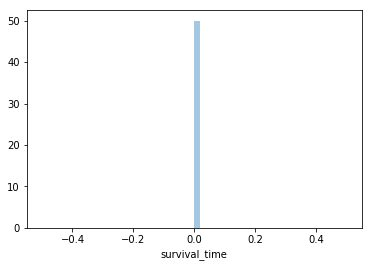

In [195]:
sns.distplot(act_oof_st['survival_time'])

In [209]:
# metrics
from scripts.metrics.score_function import score_function

def oof_transform(st, tas):
    st_t = st.copy()
    tas_t = tas.copy()

    st_t.loc[st_t['infer_survival_time'] < 1, 'survival_time'] = 1
    tas_t.loc[tas['infer_amount_spent']<0, 'infer_amount_spent'] = 0
    
    oof_df = pd.merge(st_t, tas_t, how='left', on='acc_id')[['acc_id', 'infer_survival_time', 'infer_amount_spent']]
    oof_df.columns = ['acc_id', 'survival_time', 'amount_spent']
    oof_df['survival_time'] = 12

    oof_df['amount_spent'] = oof_df['amount_spent']*10
    return oof_df

def pred_transform(st, tas, acc_id):
    st_t = st.copy()
    tas_t = tas.copy()
    
    st_t['survival_time'] = st_t.drop(columns='acc_id').median(1)
    tas_t['amount_spent'] = tas_t.drop(columns='acc_id').max(1)
    
    pred_df = pd.merge(st_t, tas_t, how='left', on='acc_id')[['acc_id', 'survival_time', 'amount_spent']]
   #  pred_df['amount_spent'] = pred_df['amount_spent']/pred_df['survival_time']
    
    pred_df = pred_df[pred_df['acc_id'].isin(acc_id)]
    return pred_df

# 예측, 실제
score_function(oof_transform(act_oof_st, act_oof_tas),
               train_label)

29236.23135813017


29236.23135813017

In [0]:
## STEP5: generate submission 
def _generate_submission():
    print('\n\nSTEP5: generating submission ...')
    
    test_predict = pd.DataFrame(columns = ['acc_id', 'survival_time','amount_spent'])
    
    test_predict['acc_id'] = test_acc_id
    test_predict['survival_time'] = s_pred
    test_predict['amount_spent'] = a_pred
    
    test_predict['amount_spent'] = [0 if i < 0 else i for i in test_predict['amount_spent']] # 마이너스값 0 처리 
    test_predict['survival_time'] = [1 if i < 1 else i for i in test_predict['survival_time']] # 1 미만 값 1 처리
    
    #testname에 따라 amountspent value 키우기
    if testname == 'test1' :
        test_predict['amount_spent'] = test_predict['amount_spent']*18 #best : 20
    elif testname == 'test2' :
        test_predict['amount_spent'] = test_predict['amount_spent']*5
    else :
        print('testname is wrong!')
        
    test_predict.to_csv(submission_path + testname + '_predict.csv',index=False)    
 

In [100]:
!ls

drive  sample_data


In [0]:
class model(object):
    def __init__(self, train_data, train_label, test1_data, test2_data, kind, folds):
        self.train_data = train_data.fillna(0)
        self.train_label = train_label
        self.test1_data = test1_data.fillna(0)
        self.test2_data = test2_data.fillna(0)
        self.features_ = train_data[list(set(train_data.columns) & set(test1_data.columns) & set(test2_data.columns))].drop(columns=['acc_id']).columns
        self.kind = kind
        self.model_st = defaultdict()
        self.model_as = defaultdict()
        self.model_tas = defaultdict()
        self.true_index = defaultdict()
        self.folds = folds
    
    
    
    def labeling(self):
        self.train_data = pd.merge(self.train_data, self.train_label[['acc_id', 'survival_time']], how='left', on='acc_id').dropna().reset_index(drop=True)
        for week in range(1, 5):
            self.train_data.loc[self.train_data['week']==week, 'survival_time'] = np.minimum(64, self.train_data.loc[self.train_data['week']==week, 'survival_time'] + 7*(4-week))

    def labeling_as(self):
        self.train_data = pd.merge(self.train_data, self.train_label[['acc_id', 'amount_spent']], how='left', on='acc_id').dropna().reset_index(drop=True)

    def labeling_tas(self, payment):
        self.train_data.drop(columns='survival_time', inplace=True)
        self.train_data = pd.merge(self.train_data, self.train_label, how='left', on='acc_id').dropna().reset_index(drop=True)
        self.train_data['adjust_survival_time'] = self.train_data['survival_time'] + self.train_data['week']*7
        
        def payment_transform(data):
            data['week'] = (data['day']-1)//7 + 1
            data = data.groupby(['acc_id', 'week']).sum().reset_index()
            return data
        payment = payment_transform(payment)
        
        def temp_func(data):
            if data['adjust_survival_time']>64:
                over_value = data['adjust_survival_time'] - 64
                data['adjust_survival_time'] = data['survival_time'] - over_value
            else:
                data['adjust_survival_time'] = data['survival_time']
            return data['adjust_survival_time']
        
        self.train_data['adjust_survival_time'] = self.train_data[['survival_time', 'adjust_survival_time']].apply(temp_func, axis=1)
        self.train_data['payment'] = 0
        
        for week in range(1, 4):
            self.train_data.loc[self.train_data['week']==week, 'payment'] = pd.merge(self.train_data.loc[self.train_data['week']==week, 'acc_id'], 
                                                                                     payment[payment['week']>week].groupby(
                                                                                         ['acc_id'])['amount_spent'].sum().reset_index().rename(columns={'amount_spent':'payment'}), 
                                                                                     how='left', on='acc_id')['payment']
            self.train_data = self.train_data.fillna(0)
        else:
            self.train_data['total_amount_spent'] = self.train_data['amount_spent'] * self.train_data['adjust_survival_time'] + self.train_data['payment']
            self.train_data = self.train_data.drop(columns=['amount_spent', 'payment'])
            for week in range(1, 5):
                self.train_data.loc[self.train_data['week']==week, 'survival_time'] = np.minimum(64, self.train_data.loc[self.train_data['week']==week, 'survival_time'] + 7*(4-week))
            else:
#                 self.train_data = self.train_data.drop(columns='survival_time').rename(columns={'adjust_survival_time':'survival_time'})
                self.train_data = self.train_data.drop(columns=['adjust_survival_time', 'survival_time'])
    
 
    
    
    
    
    
############# lgb #############

    def train_st(self, params, iteration, seed):
        LABEL='survival_time'
        for idx, true in enumerate(np.unique(self.train_data[LABEL].apply(lambda x: x if x==1 or x==64 else x//7*7).apply(lambda x: 1 if x==0 else x))):
            self.true_index[true] = idx
        else:
            self.train_data[LABEL] = self.train_data[LABEL].apply(lambda x: x if x==1 or x==64 else x//7*7).apply(lambda x: 1 if x==0 else x).apply(lambda x: self.true_index[x])
            
        skf = StratifiedKFold(n_splits=self.folds, random_state=42, shuffle=True)
        rus = RandomUnderSampler(random_state=42)
        for idx, (trn_idx, val_idx) in enumerate(skf.split(self.train_data, self.train_data[LABEL])):

            temp_train_data = pd.DataFrame()
            X, y = rus.fit_resample(self.train_data.drop(columns=LABEL), self.train_data[LABEL])
            temp_train_data = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], 1))
            temp_train_data.columns = self.train_data.columns
            
            trn_label = temp_train_data[LABEL]
            val_label = self.train_data.loc[val_idx, LABEL]
            
            train_df = lgb.Dataset(temp_train_data[self.features_], label=trn_label)
            valid_df = lgb.Dataset(self.train_data.loc[val_idx, self.features_], label=val_label)
            
            model = lgb.train(params, train_df, iteration, valid_sets = [train_df, valid_df], early_stopping_rounds = 150, verbose_eval=300)
            self.model_st['model'+str(idx)] = model
    
    def train_as(self, params, iteration, seed):
        np.random.seed(42)
        LABEL='amount_spent'
        kf = KFold(n_splits=self.folds, random_state=42, shuffle=True)
        
        for idx, (trn_idx, val_idx) in enumerate(kf.split(self.train_data)):
            
            temp_train_data = pd.DataFrame()
            round_basis = 1;SIZE=46
            for round_value in np.round(self.train_data['amount_spent'], round_basis).value_counts().index:
                temp_df = self.train_data.loc[trn_idx][np.round(self.train_data.loc[trn_idx, 'amount_spent'], round_basis).isin([round_value])]
                try:
                    temp_df = temp_df.loc[np.random.choice(temp_df.index, size=SIZE, replace=False)]
                except:
                    pass
                temp_train_data = pd.concat([temp_train_data, temp_df]).reset_index(drop=True)
            else:
                trn_label = temp_train_data[LABEL]
                val_label = self.train_data.loc[val_idx, LABEL]
                
           
                train_df = xgb.DMatrix(temp_train_data[self.features_], label=trn_label)
                valid_df = xgb.DMatrix(self.train_data.loc[val_idx, self.features_], label=val_label)
                
            a_evals = [(ad_train, 'train'), (ad_valid, 'valid')]
            model = xgb.train(xgb_params, ad_train, num_boost_round=5000, evals=a_evals, 
                                    early_stopping_rounds=100, verbose_eval=1000)
    
            self.model_as['model'+str(idx)] = model

    def train_tas(self, params, iteration, seed):
        np.random.seed(42)
        LABEL='total_amount_spent'
        kf = KFold(n_splits=self.folds, random_state=42, shuffle=True)
        
        for idx, (trn_idx, val_idx) in enumerate(kf.split(self.train_data)):
            
            temp_train_data = pd.DataFrame()
            round_basis = 1;SIZE=46
            for round_value in np.round(self.train_data['total_amount_spent'], round_basis).value_counts().index:
                temp_df = self.train_data.loc[trn_idx][np.round(self.train_data.loc[trn_idx, 'total_amount_spent'], round_basis).isin([round_value])]
                try:
                    temp_df = temp_df.loc[np.random.choice(temp_df.index, size=SIZE, replace=False)]
                except:
                    pass
                temp_train_data = pd.concat([temp_train_data, temp_df]).reset_index(drop=True)
            else:
                trn_label = temp_train_data[LABEL]
                val_label = self.train_data.loc[val_idx, LABEL]
                train_df = lgb.Dataset(temp_train_data[self.features_], label=trn_label)
                valid_df = lgb.Dataset(self.train_data.loc[val_idx, self.features_], label=val_label)
            
            model = lgb.train(params, train_df, iteration, valid_sets = [train_df, valid_df], early_stopping_rounds = 1000, verbose_eval=3000)
            self.model_tas['model'+str(idx)] = model

            
            
            
    
    
      def infer_oof(self):
        LABEL='survival_time'
        oof = np.zeros(len(self.train_data))
        skf = StratifiedKFold(n_splits=self.folds, random_state=42, shuffle=True)

        for idx, (_, val_idx) in enumerate(skf.split(self.train_data, self.train_data[LABEL])):
            oof[val_idx] = np.argmax(self.model_st['model'+str(idx)].predict(self.train_data.loc[val_idx, self.features_]), axis=1)
        else:
            oof = pd.concat([self.train_data, pd.DataFrame(oof, columns=['infer_survival_time'])], 1)
            oof = oof['acc_id', 'survival_time', 'infer_survival_time'].reset_index(drop=True)
            self.oof = oof.copy()
            
            temp_dict = defaultdict()
            for true, idx in zip(self.true_index.keys(), self.true_index.values()):
                temp_dict[idx] = true
            else:    
                self.oof['survival_time'] = self.oof['survival_time'].apply(lambda x: temp_dict[x])
                self.oof['infer_survival_time'] = self.oof['infer_survival_time'].apply(lambda x: temp_dict[x])
                return self.oof

    def infer_as_oof(self):
        LABEL='amount_spent'
        oof = np.zeros(len(self.train_data))
        kf = KFold(n_splits=self.folds, random_state=42, shuffle=True)
        
        for idx, (_, val_idx) in enumerate(kf.split(self.train_data)):
            valid_df = self.train_data.loc[val_idx]
            oof[val_idx] = self.model_as['model'+str(idx)].predict(valid_df[self.features_])
        else:
            oof = pd.concat([self.train_data, pd.DataFrame(oof, columns=['infer_amount_spent'])], 1)
            oof = oof['acc_id', 'amount_spent', 'infer_amount_spent'].reset_index(drop=True)
            self.oof_as = oof
            return self.oof_as

    def infer_tas_oof(self):
        LABEL='total_amount_spent'
        oof = np.zeros(len(self.train_data))
        kf = KFold(n_splits=self.folds, random_state=42, shuffle=True)
        
        for idx, (_, val_idx) in enumerate(kf.split(self.train_data)):
            valid_df = self.train_data.loc[val_idx]
            oof[val_idx] = self.model_tas['model'+str(idx)].predict(valid_df[self.features_])
        else:
            oof = pd.concat([self.train_data, pd.DataFrame(oof, columns=['infer_total_amount_spent'])], 1)
            oof = oof.loc[oof['week']==4, ['acc_id', 'total_amount_spent', 'infer_total_amount_spent']].reset_index(drop=True)
            self.oof_tas = oof
            return self.oof_tas
    
    
    
    
    
    
    
    def infer_pred(self):
        test1 = self.test1_data.loc[self.test1_data['week']==4].reset_index(drop=True)
        test2 = self.test2_data.loc[self.test2_data['week']==4].reset_index(drop=True)
        pred1 = np.zeros([len(test1), self.folds])
        pred2 = np.zeros([len(test2), self.folds])
        
        for idx in range(self.folds):
            pred1[:, idx] = np.argmax(self.model_st['model'+str(idx)].predict(test1[self.features_]), axis=1)+1
            pred2[:, idx] = np.argmax(self.model_st['model'+str(idx)].predict(test2[self.features_]), axis=1)+1
        else:
            test1 = pd.concat([test1['acc_id'], pd.DataFrame(pred1)], 1)
            test2 = pd.concat([test2['acc_id'], pd.DataFrame(pred2)], 1)
            self.pred_test1 = test1
            self.pred_test2 = test2
            
            return self.pred_test1, self.pred_test2
    
    def infer_as_pred(self):
        test1 = self.test1_data.loc[self.test1_data['week']==4].reset_index(drop=True)
        test2 = self.test2_data.loc[self.test2_data['week']==4].reset_index(drop=True)
        pred1 = np.zeros([len(test1), self.folds])
        pred2 = np.zeros([len(test2), self.folds])
        
        for idx in range(self.folds):
            pred1[:, idx] = self.model_as['model'+str(idx)].predict(test1[self.features_])
            pred2[:, idx] = self.model_as['model'+str(idx)].predict(test2[self.features_])
            pred1[:, idx][pred1[:, idx]<0] = 0
            pred2[:, idx][pred2[:, idx]<0] = 0
        else:
            test1 = pd.concat([test1['acc_id'], pd.DataFrame(pred1)], 1)
            test2 = pd.concat([test2['acc_id'], pd.DataFrame(pred2)], 1)
            return test1, test2

    def infer_tas_pred(self):
        test1 = self.test1_data.loc[self.test1_data['week']==4].reset_index(drop=True)
        test2 = self.test2_data.loc[self.test2_data['week']==4].reset_index(drop=True)
        pred1 = np.zeros([len(test1), self.folds])
        pred2 = np.zeros([len(test2), self.folds])
        
        for idx in range(self.folds):
            pred1[:, idx] = self.model_tas['model'+str(idx)].predict(test1[self.features_])
            pred2[:, idx] = self.model_tas['model'+str(idx)].predict(test2[self.features_])
            pred1[:, idx][pred1[:, idx]<0] = 0
            pred2[:, idx][pred2[:, idx]<0] = 0
        else:
            test1 = pd.concat([test1['acc_id'], pd.DataFrame(pred1)], 1)
            test2 = pd.concat([test2['acc_id'], pd.DataFrame(pred2)], 1)
            return test1, test2
       
        
        
    def feature_importance(self):
        feature_imp = pd.DataFrame(sorted(zip(self.st_model.feature_importance(), self.features_)), columns=['Value','Feature'])
        plt.figure(figsize=(20, 10))
        sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
        plt.title('LightGBM Features (avg over folds)')
        plt.tight_layout()
        plt.show()
        
    def load(self, return_data):
        if return_data=='train':
            return self.train_data
        elif return_data=='model':
            return self.model_st
        elif return_data=='true_dict':
            return self.true_index
        elif return_data=='feature':
            return self.features_
